In [ ]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


In [3]:

class ucb_bandit:

    # change c 
    def __init__(self, k, c, iters, mu='random'):
        # Number of arms
        self.k = k
        # Exploration parameter
        self.c = c
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)      
        self.mu = np.array(mu)
        if mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def pull(self):
        # Select action according to UCB criteria
        a = np.argmax(self.k_reward + self.c * np.sqrt((np.log(self.n)) / self.k_n))     #estimate of the variance of each action    
        reward = np.random.normal(self.mu[a], 1)      
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]       
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k)

In [12]:
k = 10 # number of arms
iters = 1000
ucb_rewards = np.zeros(iters)
ucb1_rewards = np.zeros(iters)
# Initialize bandits
ucb = ucb_bandit(k, 2, iters)
ucb1 = ucb_bandit(k, 5, iters)
episodes = 1000
# Run experiments
for i in range(episodes): 
    ucb.reset('random')
    ucb1.reset('random')
    # Run experiments
    ucb.run()
    ucb1.run()
    
    # Update long-term averages
    ucb_rewards = ucb_rewards + (ucb.reward - ucb_rewards)/(i + 1)
    ucb1_rewards = ucb1_rewards + (ucb1.reward - ucb1_rewards)/(i + 1)
    


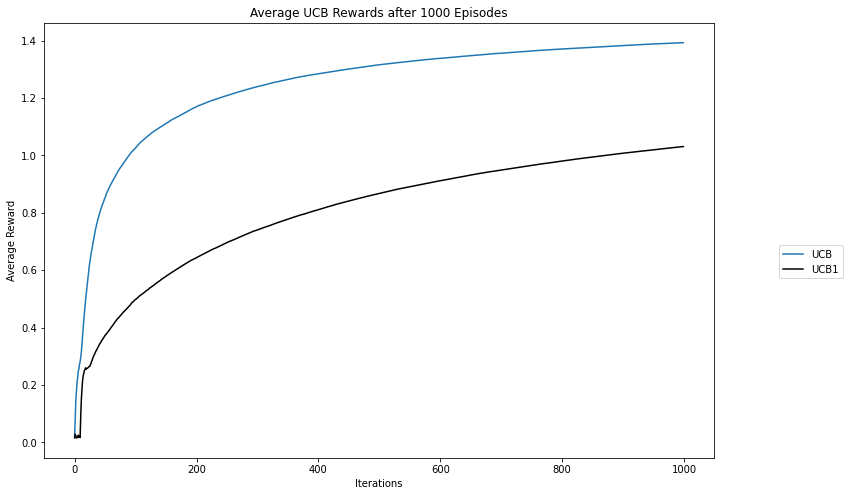

In [13]:
plt.figure(figsize=(12,8))
plt.plot(ucb_rewards, label="UCB")
plt.plot(ucb1_rewards, label="UCB1", color = '0')
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average UCB Rewards after " + str(episodes) + " Episodes")
plt.show()

In [ ]:
#as c increases, the graph converges much later and in a way nullifies the adjustment from a naive greedy to a modified one